In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from yellowbrick.text import FreqDistVisualizer
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv("C:/Users/Window10Pro/jupyter_notebook/spam_mail_classification/ham_spam.csv")

In [4]:
df.drop_duplicates(inplace = True)
df = df.dropna()
print(df["Spam"].value_counts())
df.head()

0    15635
1    14579
Name: Spam, dtype: int64


,Text,Spam
0,Subject: txu noms . for 10 / 14 - 16 / 00 atta...,0
1,Subject: re : nom / actual vols for 24 th - - ...,0
2,Subject: hpl noms for february 15 ; 2000 ( see...,0
3,Subject: fw : pooling contract template - - - ...,0
4,Subject: hpl nom . for may 26 - 29 ; 2001 ( se...,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30214 entries, 0 to 33715
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    30214 non-null  object
 1   Spam    30214 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 708.1+ KB


#clean data that is not 1 and 0 in Spam

In [6]:
dfclean = df.drop(df[(df['Spam'] != 0 ) & (df['Spam'] != 1)].index)
print(dfclean["Spam"].value_counts())
dfclean.head()

0    15635
1    14579
Name: Spam, dtype: int64


,Text,Spam
0,Subject: txu noms . for 10 / 14 - 16 / 00 atta...,0
1,Subject: re : nom / actual vols for 24 th - - ...,0
2,Subject: hpl noms for february 15 ; 2000 ( see...,0
3,Subject: fw : pooling contract template - - - ...,0
4,Subject: hpl nom . for may 26 - 29 ; 2001 ( se...,0


In [7]:
dfclean['Text'][0]

'Subject: txu noms . for 10 / 14 - 16 / 00 attached ; please find the txu nominations for the weekend of october 14 - 16 ; 2000 . no scheduled flows ( see attached file : hplnl 014 . xls ) - hplnl 014 . xls'

In [8]:
dfclean = dfclean[dfclean.Text.map(lambda x: x.isascii() == True)]

In [9]:
dfclean

,Text,Spam
0,Subject: txu noms . for 10 / 14 - 16 / 00 atta...,0
1,Subject: re : nom / actual vols for 24 th - - ...,0
2,Subject: hpl noms for february 15 ; 2000 ( see...,0
3,Subject: fw : pooling contract template - - - ...,0
4,Subject: hpl nom . for may 26 - 29 ; 2001 ( se...,0
...,...,...
33709,Subject: friendly notification how have you be...,1
33711,Subject: you are our lucky winner ! ! de natio...,1
33712,Subject: i ' m a changed man dear sir / madam ...,1
33714,Subject: save your money by getting an oem sof...,1


In [10]:
X = dfclean['Text']
y = dfclean['Spam'].astype(int)

In [29]:
type(X)

scipy.sparse._csr.csr_matrix

In [11]:
cv = CountVectorizer(stop_words='english')

In [12]:
X = cv.fit_transform(X)

In [13]:
#for visualizer
spam_data = dfclean[dfclean['Spam'] == 1]["Text"]

In [14]:
spam_data = cv.fit_transform(spam_data)

C:\Users\Window10Pro\Anaconda3\envs\spam_mail\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


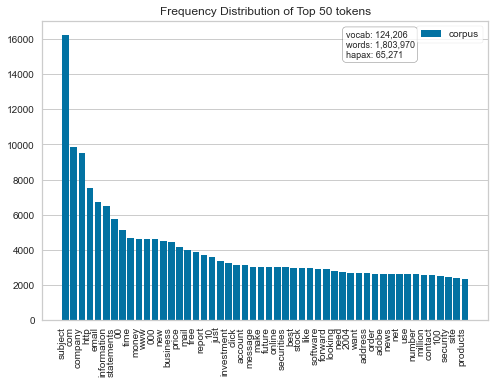

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [15]:
features   = cv.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(spam_data)
visualizer.show()

#train_test split


In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [17]:
#from yellowbrick.text import TSNEVisualizer
#from sklearn.feature_extraction.text import TfidfVectorizer

# vec = TfidfVectorizer(stop_words="english")
# transformed_text = vec.fit_transform(text)

#fig = plt.figure(figsize=(9,9))
#ax = fig.add_subplot(111)

#tsne_viz = TSNEVisualizer(ax=ax,
#                          decompose="svd",
#                          decompose_by=50,
#                          colors=["tomato", "lime"],
#                          random_state=123)

#tsne_viz.fit(X_train.toarray(), y_train)

#tsne_viz.show();

In [18]:
# X_train = cv.fit_transform(X_train)

In [19]:
# print(X_train)

#training

In [16]:
#grid search
from sklearn.model_selection import GridSearchCV
 
param_grid = {'degree' :[2,3,4],'gamma': ['scale','auto'],'C': [0.1, 1, 10],'kernel': ['linear','poly']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.983 total time=  36.1s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.982 total time=  36.8s
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.982 total time=  35.5s
[CV 4/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.983 total time=  37.1s
[CV 5/5] END C=0.1, degree=2, gamma=scale, kernel=linear;, score=0.984 total time=  35.6s
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.642 total time= 5.6min
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.638 total time= 5.4min
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.629 total time= 5.5min
[CV 4/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.642 total time= 6.0min
[CV 5/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.648 total time= 5.9min
[CV 1/5] END C=0.1, degree=2, gamma=auto, kernel

[CV 4/5] END C=1, degree=3, gamma=auto, kernel=linear;, score=0.979 total time=  29.8s
[CV 5/5] END C=1, degree=3, gamma=auto, kernel=linear;, score=0.981 total time=  28.7s
[CV 1/5] END C=1, degree=3, gamma=auto, kernel=poly;, score=0.519 total time= 6.0min
[CV 2/5] END C=1, degree=3, gamma=auto, kernel=poly;, score=0.519 total time= 6.4min
[CV 3/5] END C=1, degree=3, gamma=auto, kernel=poly;, score=0.519 total time= 6.4min
[CV 4/5] END C=1, degree=3, gamma=auto, kernel=poly;, score=0.519 total time= 6.2min
[CV 5/5] END C=1, degree=3, gamma=auto, kernel=poly;, score=0.519 total time= 6.1min
[CV 1/5] END C=1, degree=4, gamma=scale, kernel=linear;, score=0.980 total time=  32.9s
[CV 2/5] END C=1, degree=4, gamma=scale, kernel=linear;, score=0.979 total time=  31.8s
[CV 3/5] END C=1, degree=4, gamma=scale, kernel=linear;, score=0.980 total time=  31.8s
[CV 4/5] END C=1, degree=4, gamma=scale, kernel=linear;, score=0.979 total time=  32.2s
[CV 5/5] END C=1, degree=4, gamma=scale, kernel=l

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly']},
             verbose=3)

In [17]:

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
SVC(C=0.1, degree=2, kernel='linear')


In [18]:
y_pred = grid.predict(X_test)
f1_score(y_test,y_pred)

0.9814690026954178

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3091
           1       0.98      0.99      0.98      2952

    accuracy                           0.98      6043
   macro avg       0.98      0.98      0.98      6043
weighted avg       0.98      0.98      0.98      6043



In [20]:
classifier = SVC(kernel = 'linear',C=0.1)
classifier.fit(X_train, y_train)
print(classifier.score(X_test,y_test))

0.981797120635446


In [21]:
y_pred = classifier.predict(X_test)
f1_score(y_test,y_pred)

0.9814690026954178

In [23]:
scores = cross_val_score(classifier, X, y, cv=10)
print (scores)

[0.98676373 0.96194573 0.98544011 0.98146309 0.98642833 0.98477325
 0.97914598 0.97484277 0.99006951 0.96954651]


In [25]:
#test new data set
df2 = pd.read_csv("C:/Users/Window10Pro/jupyter_notebook/spam_mail_classification/spam.csv")
df2.drop_duplicates(inplace = True)
print(df2["Spam"].value_counts())
df2.head()

ham     4516
spam     653
Name: Spam, dtype: int64


,Spam,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [26]:
def binary_map(x):
  return x.map({"spam":1, "ham":0})
df2[['Spam']] = df2[['Spam']].apply(binary_map)
print(df2['Spam'].unique())
df2.head()

[0 1]


,Spam,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [27]:
df2.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1, inplace = True)
df2.head()

,Spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
X2 = df2['text']
y2 = df2['Spam']
X_test2 = cv.transform(X2)
y_pred2 = classifier.predict(X_test2)

In [31]:
accuracy_score(y2,y_pred2)

0.19887792609789126

In [29]:
f1_score(y2,y_pred2)

0.23186792802819517

In [30]:
confusion_matrix(y2, y_pred2)

array([[ 403, 4113],
       [  28,  625]], dtype=int64)

In [32]:
print(classification_report(y2, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.09      0.16      4516
           1       0.13      0.96      0.23       653

    accuracy                           0.20      5169
   macro avg       0.53      0.52      0.20      5169
weighted avg       0.83      0.20      0.17      5169



In [33]:
data = {'text':X2,'pred': y_pred2,'correct': y2}
output = pd.DataFrame(data)
print(output)
output.to_csv('output.csv')

                                                   text  pred  correct
0     Go until jurong point, crazy.. Available only ...     1        0
1                         Ok lar... Joking wif u oni...     1        0
2     Free entry in 2 a wkly comp to win FA Cup fina...     1        1
3     U dun say so early hor... U c already then say...     1        0
4     Nah I don't think he goes to usf, he lives aro...     1        0
...                                                 ...   ...      ...
5567  This is the 2nd time we have tried 2 contact u...     1        1
5568              Will Ì_ b going to esplanade fr home?     1        0
5569  Pity, * was in mood for that. So...any other s...     1        0
5570  The guy did some bitching but I acted like i'd...     1        0
5571                         Rofl. Its true to its name     1        0

[5169 rows x 3 columns]


In [34]:
test_df = pd.read_csv("C:/Users/Window10Pro/jupyter_notebook/spam_mail_classification/spam_ham_dataset.csv")

In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5171 non-null   object
 1   Spam    5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


In [36]:
test_df.head()

,text,Spam
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [37]:
x3 = test_df['text']
y3 = test_df['Spam']

In [38]:
x3_test = cv.transform(x3)
y3_pred = classifier.predict(x3_test)

In [40]:
accuracy_score(y3,y3_pred)

0.9928447108876426

In [39]:
f1_score(y3,y3_pred)

0.9877847474413998

In [41]:
data = {'text':x3,'pred': y3_pred,'correct': y3}
output = pd.DataFrame(data)
print(output)
output.to_csv('test.csv')

                                                   text  pred  correct
0     Subject: enron methanol ; meter # : 988291\r\n...     0        0
1     Subject: hpl nom for january 9 , 2001\r\n( see...     0        0
2     Subject: neon retreat\r\nho ho ho , we ' re ar...     0        0
3     Subject: photoshop , windows , office . cheap ...     1        1
4     Subject: re : indian springs\r\nthis deal is t...     0        0
...                                                 ...   ...      ...
5166  Subject: put the 10 on the ft\r\nthe transport...     0        0
5167  Subject: 3 / 4 / 2000 and following noms\r\nhp...     0        0
5168  Subject: calpine daily gas nomination\r\n>\r\n...     0        0
5169  Subject: industrial worksheets for august 2000...     0        0
5170  Subject: important online banking alert\r\ndea...     1        1

[5171 rows x 3 columns]


In [42]:
tn, fp, fn, tp = confusion_matrix(y3, y3_pred).ravel()

In [56]:
confusion_matrix(y3, y3_pred)

array([[3638,   34],
       [   3, 1496]], dtype=int64)

In [43]:
print(tn, fp, fn, tp)

3638 34 3 1496


In [44]:
fp = pd.read_csv("C:/Users/Window10Pro/jupyter_notebook/spam_mail_classification/test.csv")

In [45]:
for i in fp[(fp['pred'] == 1 ) & (fp['correct'] == 0)]['text']:
    print(i) 

Subject: spring savings certificate - take 30 % off
save 30 % when you use our customer appreciation spring savings
certificate at foot locker , lady foot locker , kids foot locker and at
our online stores !
welcome to our customer appreciation spring savings certificate !
use the special certificate below and receive 30 % off your purchases either in our stores or online . hurry ! this 4 - day sale begins thursday , march 22 and ends sunday , march 25 .
share the savings today and e - mail this offer to your friends . many items already are reduced and the 30 % discount is taken off the lowest sale price .
click below to print your customer appreciation spring savings certificate . you must present this coupon at any foot locker , lady foot locker or kids foot locker store in the u . s . foot locker canada is not participating in this program .
ready , set , save !
our spring savings discount will automatically appear when you use the links below or type camlem 21 into the promotion c

In [30]:
def predict(content):
    if(content.isascii() == False):
        return "Please check if there are non-english word in email"
    elif(content is None):
        return "there are nothing to predict"
    else:
        content = [content]
        x = cv.transform(content)
        res = classifier.predict(x)
        if (res == 1):
            return "Spam"
        else:
            return "Ham"

In [31]:
Text = '''Subject: howdy to you too .
 
 hi ,
 
 the number is 281 - 370 - 7838 .
 
 i did not think of it , but without the pipe one has to balance ones own , doesn ' t one . of course the major problem was the people with hpl , not the counter - parties . who ' s doing that for you guys ?
 
 jen came home for the memorial day weekend so we just bummed around . saw pearl harbor , watched a few dvd ' s , and ate way to much .
 
 when you get time let us know about your "" bad luck "" . i hope jake wasn ' t helping you too much .
 
 i have been occupying much to much time with our new sound system . we finally chucked our little bookshelf unit and got a pile of yamaha stuff coupled to an equally large stack of klipsch speakers . awesome is the only word to apply . i ' m sure the neighbors are loving the old people next door . ( it ' s a young couple with a baby ) ( not near as nice as the other young couple i know ) .
 
 rumbling their walls at all hours just makes me feel good . : )
 
 stock market still sucks , but as long as it pays for groceries and taxes we ' ll be ok .
 
 i ' m off to get linda ' s gas guzzlin , environment ruining , suv washed and buffed . then i must re - stock my cd - r ' s and load up on some more music . you can see how well i ' m utilizing my time in doing productive things .
 
 later ,
 
 ken
 
 p . s . i thought waha was where all the pillaging of california was taking place .'''

In [32]:
predict(Text)

ValueError: X has 124206 features, but SVC is expecting 157233 features as input.